<a href="https://colab.research.google.com/github/kulakovand/colabr_epo/blob/main/%22%D0%9B%D0%B0%D0%B1%D0%B04_0_1_ipynb%22%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow  # для выполнения данной работы рекомендуется  1.14

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -q seaborn # при необходимости

In [ ]:
import tensorflow as tf
import pandas as pd
import keras as ks


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# проверка отго что мы таки переключили эту среду выполнения на гпу
tf.test.gpu_device_name() # в случае успешности будет выдан примерно такойрезультат '/device:GPU:0' 

'/device:GPU:0'

In [ ]:
!pip install -q  sklearn

  Preparing metadata (setup.py) ... done


In [ ]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
x,y = load_breast_cancer(return_X_y=True)

# 2 варианта создать датасеты                     
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=True)
#X_train, X_test,y_train, y_test = train_test_split(x,y ,random_state=104,test_size=0.25, shuffle=True)

# printing out train and test sets
print('X_train : ')
print(len(X_train))
print('')
print('X_test : ')
print(len(X_test))
print('')
print('y_train : ')
print(len(y_train))
print('')
print('y_test : ')
print(len(y_test))

X_train : 
341

X_test : 
228

y_train : 
341

y_test : 
228


In [ ]:
# так-же, как вариант, можно в интернете найти файлы Breast Cancer Wisconsin (Diagnostic) Data Set исоздать свой набор данных
#from google.colab import files
#file = files.upload()
#X_train = pd.read_csv("xtrain.csv", header=None)
#Y_train = pd.read_csv("ytrain.csv", header=None)
#X_test = pd.read_csv("xtest.csv", header=None)
#Y_test = pd.read_csv("ytest.csv", header=None)


from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential() # Инициализация НС
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 30))
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
historyfit = classifier.fit(X_train, y_train, batch_size = 20, epochs = 200)

Epoch 1/200
18/18 [==============================] - 1s 4ms/step - loss: 0.1486 - accuracy: 0.9326
Epoch 2/200
18/18 [==============================] - 0s 4ms/step - loss: 0.2063 - accuracy: 0.9208
Epoch 3/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1532 - accuracy: 0.9384
Epoch 4/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1814 - accuracy: 0.9384
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.1785 - accuracy: 0.9267
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1758 - accuracy: 0.9413
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1597 - accuracy: 0.9296
Epoch 8/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1502 - accuracy: 0.9208
Epoch 9/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1541 - accuracy: 0.9326
Epoch 10/200
18/18 [==============================] - 0s 4ms/step - loss: 0.1833 - accuracy: 0.9384
Epoch 11/

In [ ]:
#historyfit.history
historyfit.history['loss'].insert(0, 1.0)
historyfit.history['accuracy'].insert(0, 0.1)

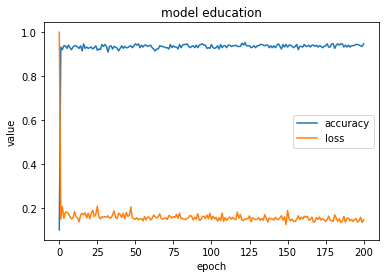

In [ ]:
import matplotlib.pyplot as plt
plt.plot(historyfit.history['accuracy'])
plt.plot(historyfit.history['loss'])
plt.title('model education')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [ ]:
Y_pred = classifier.predict(X_test) 

8/8 [==============================] - 0s 2ms/step


In [ ]:
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

In [ ]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
 total=total+1
 #print(str(Y_pred[i])+' '+str(y_test[i]))
 if(str(y_test[i]) == str(Y_pred[i])):
  correct=correct+1
 else:
  wrong=wrong+1


print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong)) 

Total 228
Correct 197
Wrong 31
